# How to visualize different types of survey questions?

Conducting surveys is one of the most straight forward ways to understand what people think. In this notebook, let's visualize the 2018 Stack Overflow Developer Survey data based on various question types.

## About the dataset
### 2018 Stack Overflow Developer Survey

I'll be using 2 datasets provide by Stack Overflow: 

1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name

The survey was fielded from January 8 to January 28, 2018. The median time spent on the survey for qualified responses was 25.8 minutes, and the median time for those who finished the entire survey was 29.4 minutes.

## Survey question/data types

Survey questions can be divided into 2 types: closed-ended and open-ended. While closed-ended questions provide a list of answers for respondents to choose, open-ended questions allow respondents to answer in their own words. In this notebook, I'll Solely focus on closed-ended questions.

The Stack Overflow 2018 survey provides us with various types of questions:
- multiple choice - single select
- multiple choice - multiselect
- rank order
- liker scales
- rating scales

I'll also put the data types of the dataset into 2 categoricals:
- numberical
- categorical

Now let's visualize the survey based on the question and data types!

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from matplotlib import cm
from collections import OrderedDict

In [2]:
pd.set_option('display.max_columns', None)

filename_s = "survey_results_schema.csv"
schema = pd.read_csv(filename_s)

filename = "survey_results_public.csv"
df = pd.read_csv(filename)

/Users/jacquelinewong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print('The size of the dataframe is: '+ str(df.shape))

df.head(3)

The size of the dataframe is: (98855, 129)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [4]:
# this function is from https://www.kaggle.com/nityeshaga/how-indian-developers-differ#Helper-functions:

schema = schema.set_index('Column')
def get_column_text(name_list):
    return [name+': '+schema.loc[name,'QuestionText'] for name in name_list]

get_column_text(['AIDangerous','AIInteresting','AIResponsible','AIFuture'])

['AIDangerous: What do you think is the most dangerous aspect of increasingly advanced AI technology?',
 'AIInteresting: What do you think is the most exciting aspect of increasingly advanced AI technology?',
 'AIResponsible: Whose responsibility is it, <u>primarily</u>, to consider the ramifications of increasingly advanced AI technology?',
 "AIFuture: Overall, what's your take on the future of artificial intelligence?"]

# Multiple Choice - Single Select

Multiple choice - single select can be seen as the foundation of every other kinds of closed-ended survey questions.

## Categorical - Dichotomous
Dichotomous question is a type of question that has only 2 possible answers. For example:

```
Do you code as a hobby?
 - Yes
 - No
```

We can simply use the following one line of code to understand approximate how many people code as a hobby.


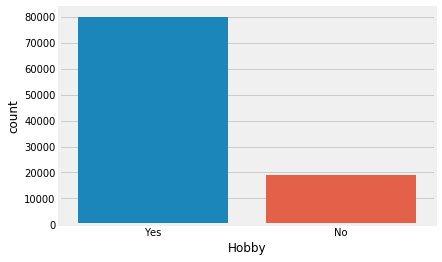

In [5]:
sns.countplot(x='Hobby', data=df);

## Categorical

If the question has more than 2 answers, apart from countplot, we can also plot a pie chart to compare the percentage.

Again, one line of code can give you the insight.

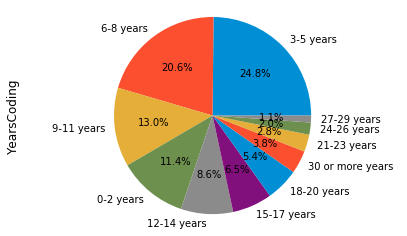

In [6]:
df['YearsCoding'].value_counts().plot.pie(autopct='%.1f%%').axis('equal');

In order to make the chart more presentable, let's do a bit of fomatting.

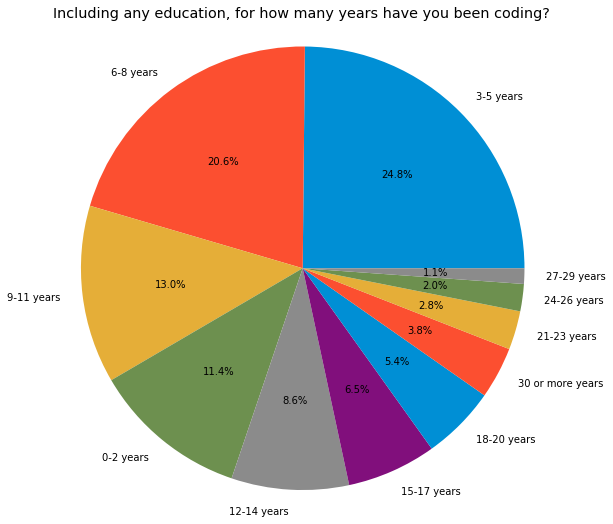

In [7]:
df['YearsCoding'].value_counts().plot.pie(autopct='%.1f%%',
                                         title='Including any education, for how many years have you been coding?',
                                         figsize=(9,9))
plt.ylabel('')
plt.axis('equal')
plt.show()

## Numerical

There are only 2 variables that are numerical: `ConvertedSalary` and `Salary`. Since we want the number to be comparable, let's use `ConvertedSalary`.

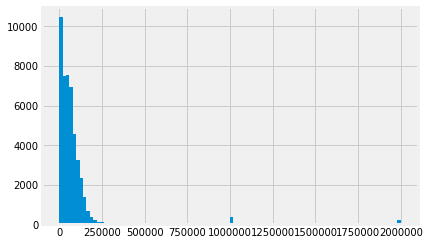

In [8]:
df['ConvertedSalary'].hist(bins=100);

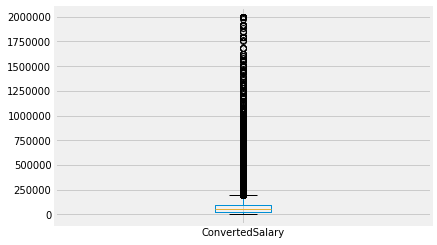

In [9]:
df['ConvertedSalary'].plot.box();

Oh no! Even with 100 bins there're still a lot of outliers and the data is severely right-skewed!

Let's clean up the outliers and keep data that are only 1 standard deviation away from the mean.

### Remove outliers

In [10]:
mean, std = np.mean(df['ConvertedSalary']), np.std(df['ConvertedSalary'])
z_score = np.abs((df['ConvertedSalary'] - mean) / std)
threshold = 1 # remove data that are 1 standard deviation away from the mean salary

from scipy.stats import norm
good = z_score < threshold
print(f"Rejection {(~good).sum()} points")
print(f"z-score of 1 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")

df_salary = df[good] # also removes row with null salary
df_salary.shape

Rejection 53163 points
z-score of 1 corresponds to a prob of 31.73%


(45692, 129)

Since we removed 32% of the data points, let's use `df_salary` dataframe for analysis related to salary and `df` for all other analysis, so that we can save space when analyzing salary data and preserve more data points when not analyzing salary data.

## Dichotomous X Categorical

The visualizations we've done so far all use one variable, now let's mix and match them!

Right off the bat, not only can we tell that there're way more people who treat coding as a hobby, but we can also sense how many years the respondents had been coding.

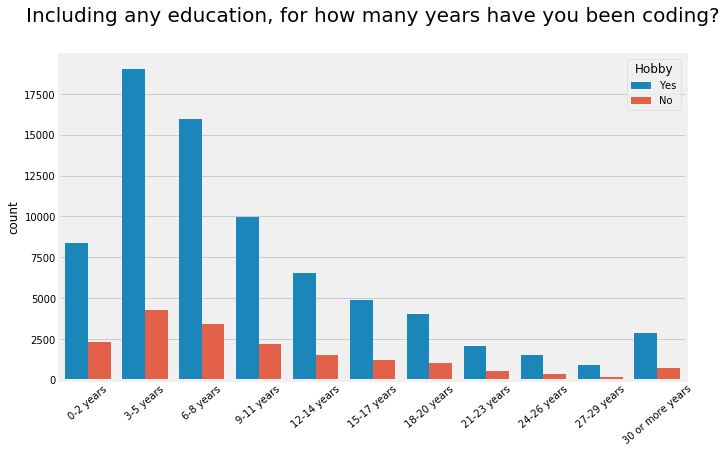

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(x="YearsCoding", hue="Hobby", data=df,
                  order=['0-2 years','3-5 years','6-8 years','9-11 years','12-14 years','15-17 years','18-20 years','21-23 years','24-26 years','27-29 years','30 or more years'])
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set_title('Including any education, for how many years have you been coding?',fontsize=20, y=1.08)

plt.show()

## Categorical X Numerical

The cluster countplot looks great! But what if my main research target is to find out what kind of people tend to have higher salary? Simple, just overlay the countplot with a lineplot!

To avoid writing repeated code, let's write a function to plot a combo chart.

In [12]:
def plot_combo(categorical, dichotomous=None):
    '''Plots a combo chart (line chart + countplot) based on 
    one numerical variable (ConvertedSalary), 
    one categorical variable, 
    and one optional dichotomous variable in the dataset 'df_salary'.

    Args:
      categorical (str): x axis variable.
      dichotomous (str, optional): hue variable.

    Returns:
      seaborn countplot overlay with searborn line chart
    
    '''
    
    #Create combo chart
    fig, ax = plt.subplots(figsize=(10,6))

    ax = sns.countplot(x=categorical, hue=dichotomous, data=df_salary, ax=ax, palette="Paired",
                      order=df_salary[categorical].value_counts().index)
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.set_title(get_column_text([categorical])[0].split(': ')[1], fontsize=20, y=1.08)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(False)

    axx= ax.twinx()
    axx= sns.lineplot(x=categorical, y="ConvertedSalary", data=df_salary, color='lightseagreen', sort=False)
    axx.set_ylabel('Converted Salary')


    plt.subplots_adjust(hspace = 0.4)    
    plt.show()

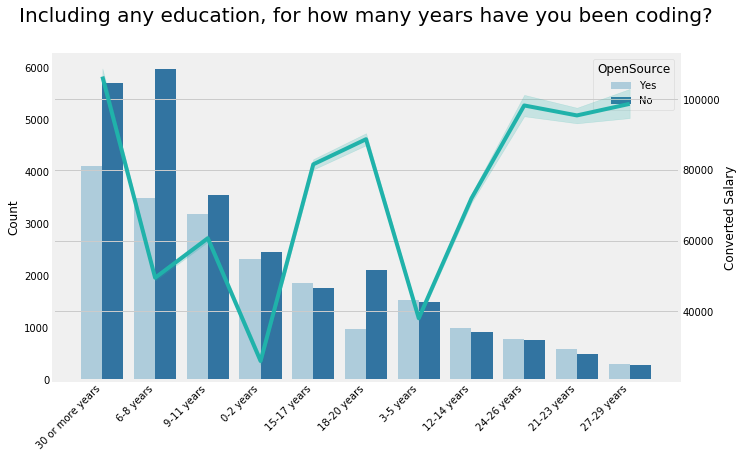

In [13]:
plot_combo('YearsCoding','OpenSource')

Hmmm, the shape of the cluster countplot looks pleasant as the bars go from the highest to the lowest, but the labels are not ordered logically.

Although the `order` parameter in seaborn countplot allows us to order the xtick labels logically, the respective `sort` parameter in seaborn lineplot won't let us do so. As a result, this function is perfect if we don't care how the xtick are sorted.

If we do want the xtick labels to follow a logical sequence, we can use only one plot but this time with the `hue` parameter to achieve the same level of granularity.


In [14]:
def plot_boxen(categorical, order=None, dichotomous=None):
    """Plots a boxenplot based on 
    one numerical variable (ConvertedSalary), 
    one categorical variable, 
    and one optional dichotomous variable in the dataset 'df_salary'.

    Args:
      categorical (str): x axis variable.
      order (list, optional): desired order of the x ticks.
      dichotomous (str, optional): hue variable.

    Returns:
      seaborn boxenplot
    """   
    fig, ax = plt.subplots(figsize=(14, 6))

    ax = sns.boxenplot(x=categorical, 
                       y="ConvertedSalary",
                       hue=dichotomous, 
                       data=df_salary,
                       order=order)
    if dichotomous:
        ax.legend(loc='best')
    ax.set_ylabel('Annual Salary in USD')
    ax.set_xlabel('')    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(get_column_text([categorical])[0].split(': ')[1], fontsize=20, y=1.08)

    return plt.show()

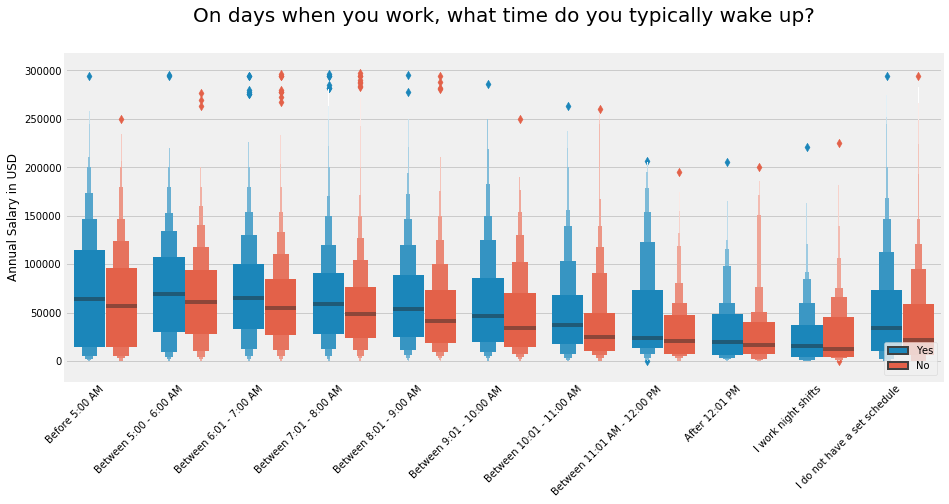

In [15]:
categorical = 'WakeTime'
order = ['Before 5:00 AM','Between 5:00 - 6:00 AM','Between 6:01 - 7:00 AM','Between 7:01 - 8:00 AM','Between 8:01 - 9:00 AM','Between 9:01 - 10:00 AM','Between 10:01 - 11:00 AM','Between 11:01 AM - 12:00 PM','After 12:01 PM','I work night shifts','I do not have a set schedule']
dichotomous='OpenSource'

plot_boxen(categorical, order, dichotomous)

It seems morning people and people who participate in open source projects tend to have slightly higher salaries. However, we need to perform hypothesis test to statically confirm this 'relationship'. Later on, I'll work on a new notebook to walk you through this process.

For the `plot_boxen()` function, the `dichotomous` parameter is optional, let's try not to use it this time.

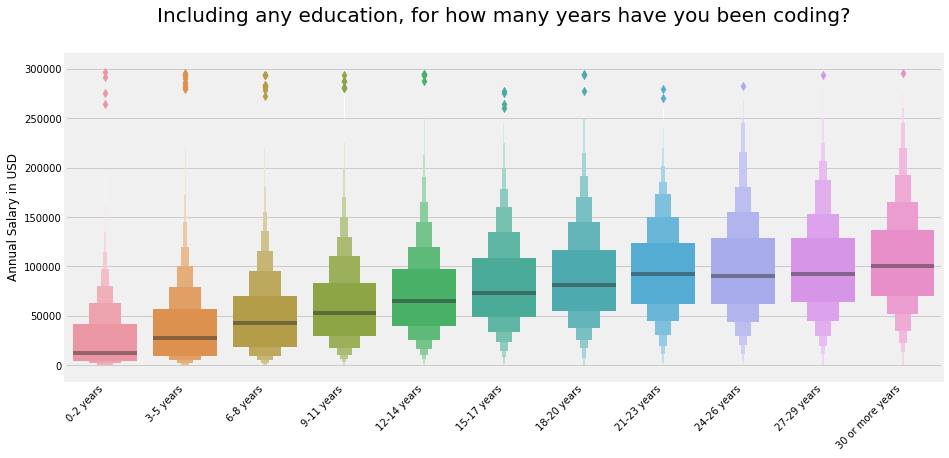

In [16]:
order=['0-2 years','3-5 years','6-8 years','9-11 years','12-14 years','15-17 years','18-20 years','21-23 years','24-26 years','27-29 years','30 or more years']
categorical = 'YearsCoding'

plot_boxen(categorical, order)

A clear relationship between salary and experience!

# Mutiple Choice - Multiselect

Up until now, we've only dealt with questions that only one answer can be selected. But what if the end of the question reads 'select all that apply'?

Let's take this following question as an example:

In [17]:
print(get_column_text(['IDE']))

df['IDE'].dropna().head()

['IDE: Which development environment(s) do you use regularly?  Please check all that apply.']


0                 Komodo;Vim;Visual Studio Code
1            IPython / Jupyter;Sublime Text;Vim
3              Visual Studio;Visual Studio Code
4    Notepad++;Visual Studio;Visual Studio Code
5           IntelliJ;PyCharm;Visual Studio Code
Name: IDE, dtype: object

We can easily find that:
- the IDEs are saperated by ';'
- the order of the IDEs seems to follow a sequence

But how do we distill the information? 

If we are only interested in a certain group of people, say those who use Vim and those doesn't, we can the `series.str.contains()` function to create an array of booleans and then use it to classify the entire dataset into 2 categories.

False    74.16775
True     25.83225
Name: IDE, dtype: float64


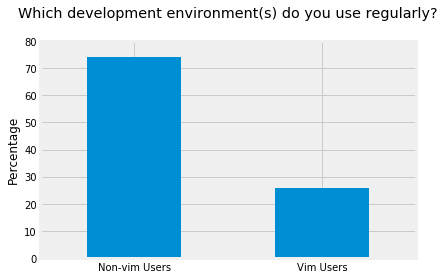

In [18]:
# Frequency table
vim_bool = df["IDE"].str.contains('Vim') # returns an array of booleans
freq_table = vim_bool.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table
freq_table.plot.bar()
plt.title('Which development environment(s) do you use regularly?',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Non-vim Users','Vim Users'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,80])
plt.show()

Or you can **create a new column and treat it like a normal categorical (dichotomous) variable** and use any of the above functions to plot!

A sample code can be 
`df['Vim'] = df["IDE"].str.contains('Vim')`

### Taking it to the next level

Now that we have so many developers telling us what IDE they used, isn't it the hight time for us to find out **what is the most popular IDE?** 

As the string is delimited by `;`, we can use `.str.split(';')` to split a single column into multiple ones. Passing the `expand=True` argument into this function, we can build a out of it. In addition, each row still represents one respondent.

In [19]:
ide_lists = df["IDE"].str.split(';', expand=True) # expand=True creates a new dataframe
ide_lists.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,Komodo,Vim,Visual Studio Code,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,IPython / Jupyter,Sublime Text,Vim,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Visual Studio,Visual Studio Code,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Notepad++,Visual Studio,Visual Studio Code,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Awesome! Every IDE is in one cell now. As we wanted to count how many times each IDE is mentioned, it doesn't matter how the data is organized, meaning if we transpose it or stack it, each IDE still appear a certain number of times. Our old friend `value_counts()` is a powerful function for counting Pandas Series, so let's `stack()` it into a Pandas Series and count!

In [20]:
ide_freq = ide_lists.stack().value_counts(normalize = True)*100
ide_freq

Visual Studio Code    11.691380
Visual Studio         11.508980
Notepad++             11.457819
Sublime Text           9.702777
Vim                    8.664878
IntelliJ               8.348126
Android Studio         6.476526
Eclipse                6.323043
Atom                   6.039656
PyCharm                4.015909
Xcode                  3.552791
PHPStorm               3.004257
NetBeans               2.735996
IPython / Jupyter      2.492204
Emacs                  1.370667
RStudio                1.113528
RubyMine               0.534743
TextMate               0.359461
Coda                   0.216655
Komodo                 0.191742
Zend                   0.133018
Light Table            0.065842
dtype: float64

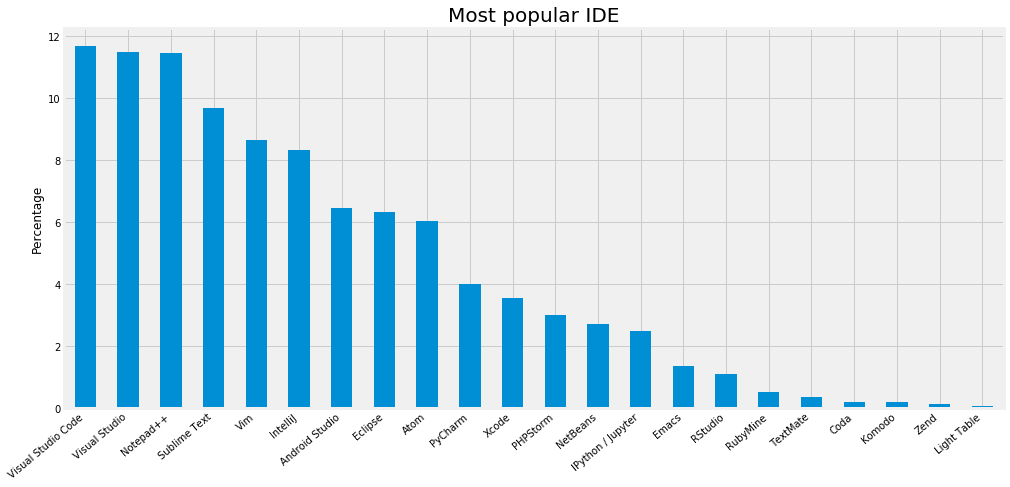

In [21]:
ide_freq.plot(kind='bar', figsize=(15,7))

plt.title('Most popular IDE',fontsize=20)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks(rotation=40, ha='right')

plt.show()

Amazing! The once complicated now solved! If you are interested in digging deeper, check out https://www.kaggle.com/notslush/altair-visualization-2018-stackoverflow-survey. This developer took the multiselect question to an entire new level. In their notebook, you can figure out which IDE pair is more prevalent.

# Rank Order 


Moving away from multiple choice, we now face another common type of survey question - ranking. This type of question comes in a matrix and asks you to rank some attributes from the lowest to the highest.

In [22]:
AssessJob_list = ['AssessJob'+str(i) for i in range(1,11)]
get_column_text(AssessJob_list)

["AssessJob1: Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The industry that I'd be working in",
 'AssessJob2: Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The financial performance or funding status of the company or organization',
 "AssessJob3: Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The specific department or team I'd be working on",
 "AssessJob4: Imagine that you are assessing a potential job opportunit

### Reverse Coding

The question states '1 is the most important and 10 is the least important', and it makes sense as it's how we *rank* things in real life. However, when we plot it on a line chart or bar plot, it's somewhat counter-intuitive - we usually perceive the higer bar to be more preferable. As a result, we need to perform reverse coding in this case.

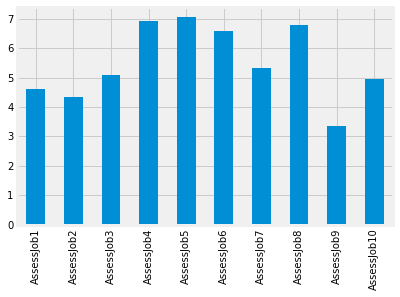

In [23]:
df[AssessJob_list] = df[AssessJob_list].apply(lambda x: 11-x, axis=0)

df[AssessJob_list].mean().plot(kind='bar');

Cool! Now let's get one more categorical variable involved and make the xtick labels more understandable, as the variable names don't help that much in this case.

In [24]:
def plot_heatmap(categorical, rank_cols_list, labels=None):
    '''Plots a heatmap for a list of rank-order columns based on a categorical variable.

    Args:
      categorical (str): y axis variable.
      rank_cols_list (list): x axis variable, a list of strings.
      labels (list, optional): a list of strings.

    Returns:
      seaborn heatmap
    
    '''
    fig, ax = plt.subplots(figsize=(10,6))
    table = pd.pivot_table(df,index=categorical,values=rank_cols_list, fill_value=0, aggfunc=np.mean)
    ax = sns.heatmap(table, cmap='GnBu', annot=True,cbar=False)
    
    if labels:
        ax.set_xticklabels(labels, rotation=45, ha='right')
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.show()

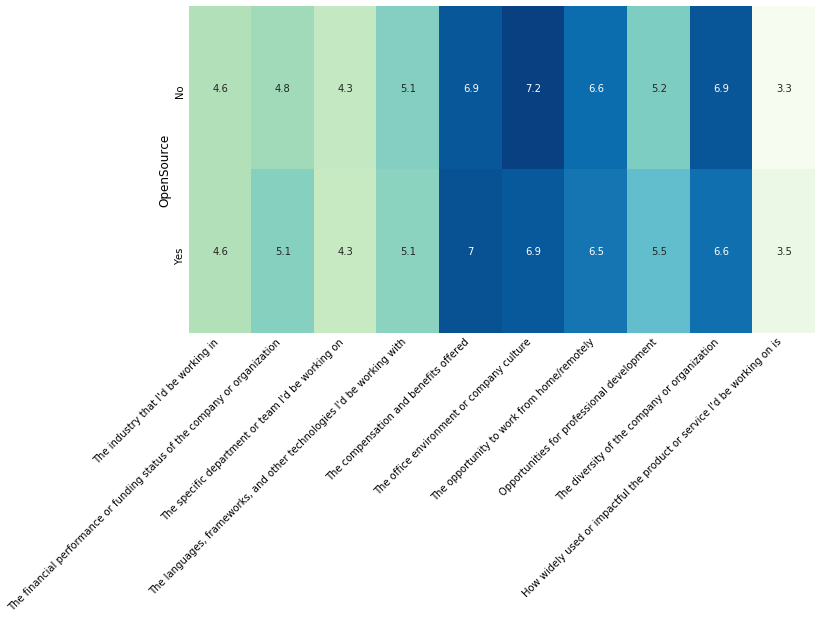

In [25]:
labels=[]
for question in get_column_text(AssessJob_list):
    labels.append(question.split('. ')[-1])
    
plot_heatmap('OpenSource',AssessJob_list, labels)

# Likert Scale

Even if you are unfamiliar with this name, chances are you have already seen this type of questions before. Likert Scale questions typically ask 'do you agree or disagree' or 'are you satistified or unsatistified'. 

There're 3 groups of likert scale questions in this survey.

## Sanity check

One thing with Likert scale questions is that sometimes respondents randomly select the same answer for all questions. Although the fact that respondents *voluntarily* chose to answer these *optional* questions highly increased the quality of the result, to be on the safe side, we need to perform sanity check and remove respondents who select the same choice for every question.


In [26]:
HypotheticalTools_list = ['HypotheticalTools'+str(i) for i in range(1,6)]
get_column_text(HypotheticalTools_list)

['HypotheticalTools1: Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. A peer mentoring system',
 'HypotheticalTools2: Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. A private area for people new to programming',
 'HypotheticalTools3: Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. A programming-oriented blog platform',
 'HypotheticalTools4: Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. An employer or job review system',
 'HypotheticalTools5: Please rate your interest in participating in each of the follo

In [27]:
df[HypotheticalTools_list].sample(10)

,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5
36462,A little bit interested,A little bit interested,Extremely interested,A little bit interested,A little bit interested
75911,Very interested,Somewhat interested,Very interested,Very interested,Very interested
25080,NaN,NaN,NaN,NaN,NaN
34907,NaN,NaN,NaN,NaN,NaN
75431,NaN,NaN,NaN,NaN,NaN
15593,A little bit interested,A little bit interested,Not at all interested,A little bit interested,A little bit interested
68211,Somewhat interested,Somewhat interested,Extremely interested,Extremely interested,Extremely interested
45810,Not at all interested,Not at all interested,Somewhat interested,Somewhat interested,Somewhat interested
79018,Somewhat interested,A little bit interested,Somewhat interested,Somewhat interested,Somewhat interested
13643,NaN,NaN,NaN,NaN,NaN


In [28]:
con1 = df['HypotheticalTools1']==df['HypotheticalTools2']
con2 = df['HypotheticalTools1']==df['HypotheticalTools3']
con3 = df['HypotheticalTools1']==df['HypotheticalTools4']
con4 = df['HypotheticalTools1']==df['HypotheticalTools5']

df_ht = df[~(con1 & con2 & con3 & con4)]

Questions in a likert scale basically ask the same thing, so it's important to put them in the one visual and compare them side-by-side.

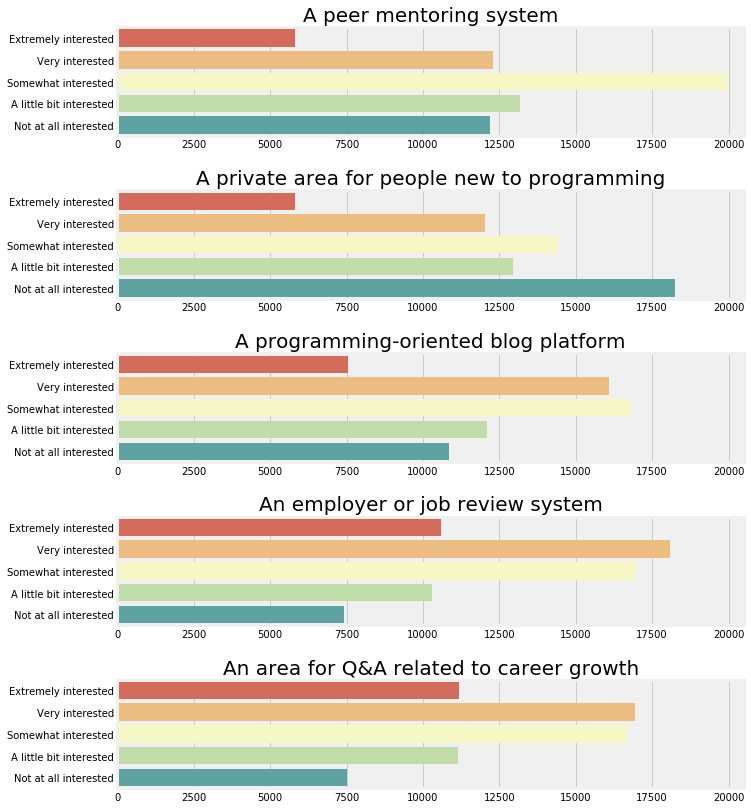

In [29]:
fig = plt.figure(figsize=(10,14))

for sp in range(0,5):
    ax = fig.add_subplot(5,1,sp+1)
    ax = sns.countplot(data=df_ht, y=HypotheticalTools_list[sp], palette="Spectral",
                       order=['Extremely interested','Very interested','Somewhat interested','A little bit interested','Not at all interested'])
    
    ax.set(ylabel='',xlabel='')
    title = get_column_text([HypotheticalTools_list[sp]])[0].split('. ')[-1]
    ax.set_title(title, fontsize=20)
    ax.set_xlim(0, 20500)

    
plt.subplots_adjust(hspace = 0.5)    
plt.show()

Let's take a look at another example.

**In this case, I will NOT do sanity check**, as I believe it make sense for respondents to give identical answers for these *three* questions. Whereas, in the previous example, it'll hardly make sense for respondents to choose the same choice for all *five* questions.

In [30]:
AgreeDisagree_list = ['AgreeDisagree'+str(i) for i in range(1,4)]
get_column_text(AgreeDisagree_list)

['AgreeDisagree1: To what extent do you agree or disagree with each of the following statements? I feel a sense of kinship or connection to other developers',
 'AgreeDisagree2: To what extent do you agree or disagree with each of the following statements? I think of myself as competing with my peers',
 "AgreeDisagree3: To what extent do you agree or disagree with each of the following statements? I'm not as good at programming as most of my peers"]

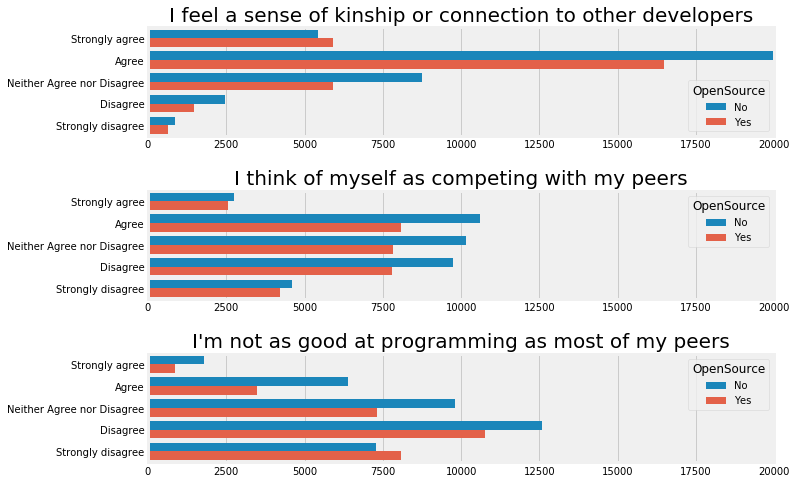

In [31]:
fig = plt.figure(figsize=(10,8))

for sp in range(0,3):
    ax = fig.add_subplot(3,1,sp+1)
    ax = sns.countplot(data=df, y=AgreeDisagree_list[sp], hue="OpenSource",
                       order=['Strongly agree','Agree','Neither Agree nor Disagree','Disagree','Strongly disagree'])
    
    ax.set(ylabel='',xlabel='')
    title = get_column_text([AgreeDisagree_list[sp]])[0].split('? ')[-1]
    ax.set_title(title, fontsize=20)
    ax.set_xlim(0, 20000)

    
plt.subplots_adjust(hspace = 0.5)    
plt.show()

Wait a second, didn't I just write repeated code? Why I didn't write a function like I normally do?

Allow me to explain myself - 
Apart from usual variables, there're some parameters I need to pass in if I am to create a function, such as
 - order. Some questions ask how satisfied, while some ask how agree; plus some likert scale is 5-point and some is 7-point
 - delimiter. Some questions split on `'. '` while some do on `'? '`
 - number of subplot. The number of questions in a likert scale varies
 
But none of these is why I didn't create a function! The ture reason lies in `xlim`. In order to make every subplot comparable, I *must* set the same xlim for each subplot. Nevertheless, there's no way I can predict the maximum xlim without first plotting it, because the xlim depends on the questions themselves as well as the number of choices.


Moving on!

Because there's an interval logic between 'Extremely interested' and 'Not at all interested', let's convert the strings into integers and do some math.

In [32]:
# Note that I set 'Not at all interested' to 0, as I want to know how 'interested' people are
interest = {"Not at all interested":0, 'A little bit interested':1, 
       'Somewhat interested':2 ,'Very interested':3, 'Extremely interested':4 }

HypotheticalTools = df_ht[HypotheticalTools_list].dropna().copy()

for col in HypotheticalTools_list:
    HypotheticalTools[col] = HypotheticalTools[col].map(interest)
    
HypotheticalTools.head()

,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5
5,1,0,3,3,4
6,3,1,4,3,3
7,3,3,3,1,4
13,2,4,4,1,2
15,1,1,0,0,0


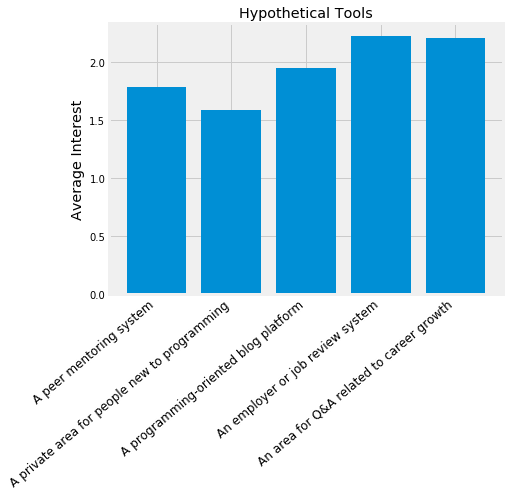

In [33]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.bar(x = np.arange(5), height = HypotheticalTools.mean())
ax.set_title('Hypothetical Tools', size='x-large')
ax.set_ylabel('Average Interest', size='x-large')
ax.set_xticks(np.arange(5))
ax.set_xticklabels([x.split('. ')[-1] for x in get_column_text(HypotheticalTools_list)], 
                   rotation=40, size='large', ha='right')

fig.tight_layout()

Now's it's quite clear that respondents were interested in 'A private area for people new to programming' the least!

# Moving forward

Wow I didn't expect this notebook to be so long. I hope you enjoyed this tutorial and found it helpful. 

This notebook is meant to act as a primer in visualizing different types of survey question. When it comes to actually analyzing the survey, however, a lot more statistics need to be done! 